In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

# === STEP 1: Load your cleaned dataset ===
# Replace with your actual file path or DataFrame
df = pd.read_csv(r"C:\Soundhar\Project\Microsoft - Cybersecurity\enhanced_dataset.csv")  

In [10]:
print(df.columns)

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'MitreTechniques', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'LastVerdict', 'CountryCode', 'State', 'City',
       'SuspicionLevel_is_missing', 'LastVerdict_is_missing', 'Hour', 'Day',
       'Weekday', 'is_weekend', 'day_period', 'is_high_risk_time',
       'is_suspicious_activity', 'alerts_per_org', 'alerts_per_detector',
       'alerts_per_category', 'Id_log', 'AlertId_log', 'IncidentId_log'],
      dtype='object')


Label Encoding for each of these features

In [11]:
from sklearn.preprocessing import LabelEncoder

# Columns that must be encoded
categorical_cols = ['Category', 'MitreTechniques', 'IncidentGrade', 'EntityType',
                    'EvidenceRole', 'day_period']

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


In [12]:
X = df.drop("LastVerdict", axis=1)
y = df["LastVerdict"]

# Split the data
from sklearn.model_selection import train_test_split
X_train_clean, X_val_clean, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now fit the model
lgb_grid.fit(X_train_clean, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.359988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7017
[LightGBM] [Info] Number of data points in the train set: 3806734, number of used features: 50
[LightGBM] [Info] Start training from score -11.220457
[LightGBM] [Info] Start training from score -11.933406
[LightGBM] [Info] Start training from score -3.089249
[LightGBM] [Info] Start training from score -0.267579
[LightGBM] [Info] Start training from score -3.175076
[LightGBM] [Info] Start training from score -1.914451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

GridSearchCV(cv=2, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1], 'max_depth': [-1],
                         'n_estimators': [100], 'num_leaves': [31]},
             scoring='f1_weighted')

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris  # Or use your own dataset

# Example dataset (replace with your own)
data = load_iris()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1, 0.2]
}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
Best Score: 0.9583333333333334


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:48:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train final model with best parameters:

In [16]:
best_params = grid_search.best_params_
best_model = XGBClassifier(**best_params, eval_metric='mlogloss')
best_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, feature_weights=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

Evaluate on test data:

In [17]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



 1. Save the Trained Model

In [18]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'xgb_best_model.joblib')


['xgb_best_model.joblib']

2. Visualize Feature Importance

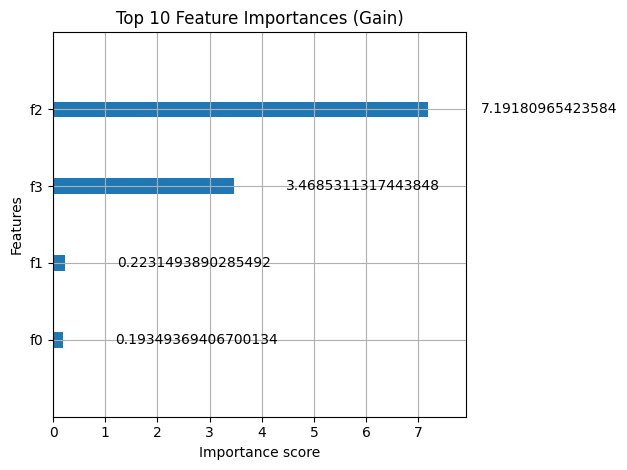

In [19]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plot_importance(best_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances (Gain)")
plt.tight_layout()
plt.show()


1. Analyze Class Imbalance

In [20]:
from collections import Counter
print(Counter(y_train))


Counter({np.int64(1): 41, np.int64(0): 40, np.int64(2): 39})


2. Technique 1: Apply SMOTE (Synthetic Minority Over-sampling Technique)

In [21]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


3. Technique 2: Adjust Class Weights (for XGBoost)

In [22]:
# Compute scale_pos_weight manually (if binary classification)
from collections import Counter
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]

xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='mlogloss')


 4. Technique 3: Ensemble Methods

In [23]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)


BalancedRandomForestClassifier(random_state=42)

In [24]:
from imblearn.ensemble import EasyEnsembleClassifier

eec = EasyEnsembleClassifier(n_estimators=10, random_state=42)
eec.fit(X_train, y_train)


EasyEnsembleClassifier(random_state=42)

 5. Evaluation Matters

In [25]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Feature Importance

1. Built-in Feature Importance (XGBoost)

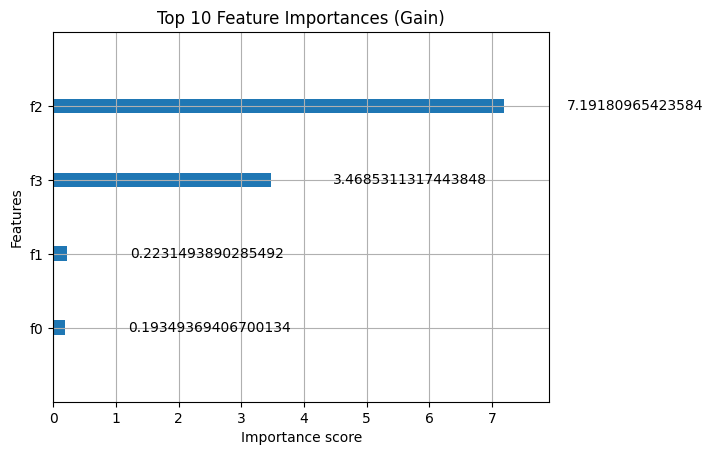

In [26]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance (based on gain by default)
plot_importance(grid_search.best_estimator_, importance_type='gain', max_num_features=10)
plt.title("Top 10 Feature Importances (Gain)")
plt.show()


2. Permutation Importance (Model-Agnostic)

Manually define feature names 

In [33]:
feature_names = [f'feature_{i}' for i in range(X_test.shape[1])]


In [34]:
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)


In [38]:
top_n = min(10, len(importance_df))  # Avoids mismatch if there are <10 features
top_features = importance_df.head(top_n)


C:\Users\91809\AppData\Local\Temp\ipykernel_21900\672942894.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


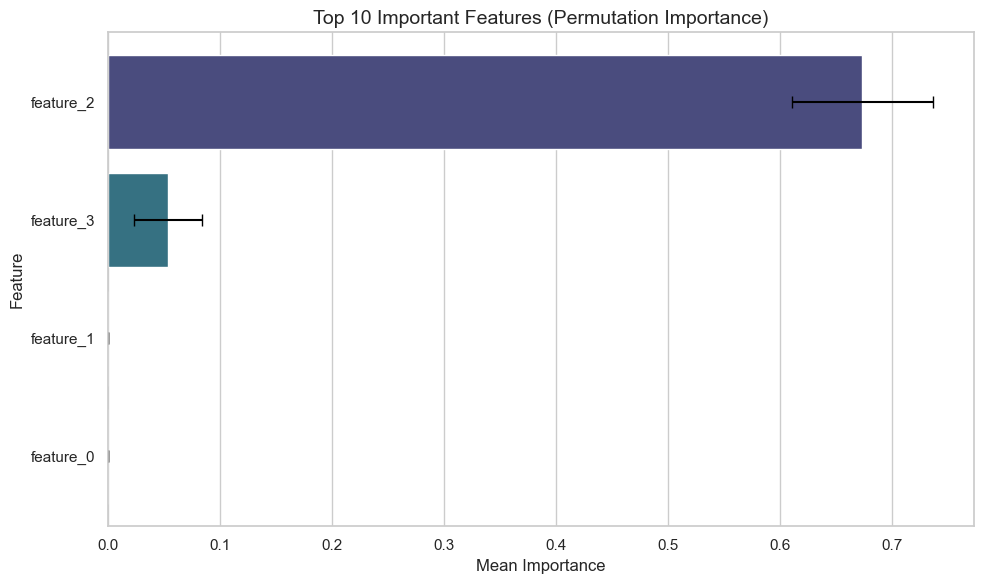

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Adjust top_n safely
top_n = min(10, len(importance_df))
top_features = importance_df.head(top_n)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='importance_mean',
    y='feature',
    data=top_features,
    palette='viridis'
)

# Add error bars manually with plt.errorbar if needed
plt.errorbar(
    x=top_features['importance_mean'],
    y=range(top_n),
    xerr=top_features['importance_std'],
    fmt='none',
    ecolor='black',
    capsize=4
)

plt.title('Top 10 Important Features (Permutation Importance)', fontsize=14)
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


SHAP plots for deeper feature effect interpretation

In [43]:
!pip install shap


  Using cached shap-0.47.2-cp312-cp312-win_amd64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.61.2-cp312-cp312-win_amd64.whl.metadata (2.9 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached llvmlite-0.44.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
Using cached shap-0.47.2-cp312-cp312-win_amd64.whl (545 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.61.2-cp312-cp312-win_amd64.whl (2.8 MB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
Using cached llvmlite-0.44.0-cp312-cp312-win_amd64.whl (30.3 MB)



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import shap

explainer = shap.TreeExplainer(grid_search.best_estimator_)
shap_values = explainer.shap_values(X_test)


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


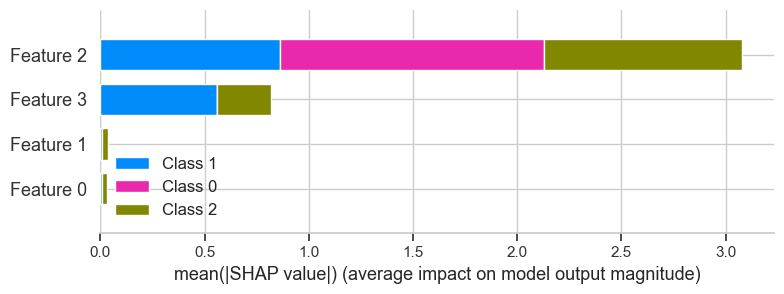

<Figure size 640x480 with 0 Axes>

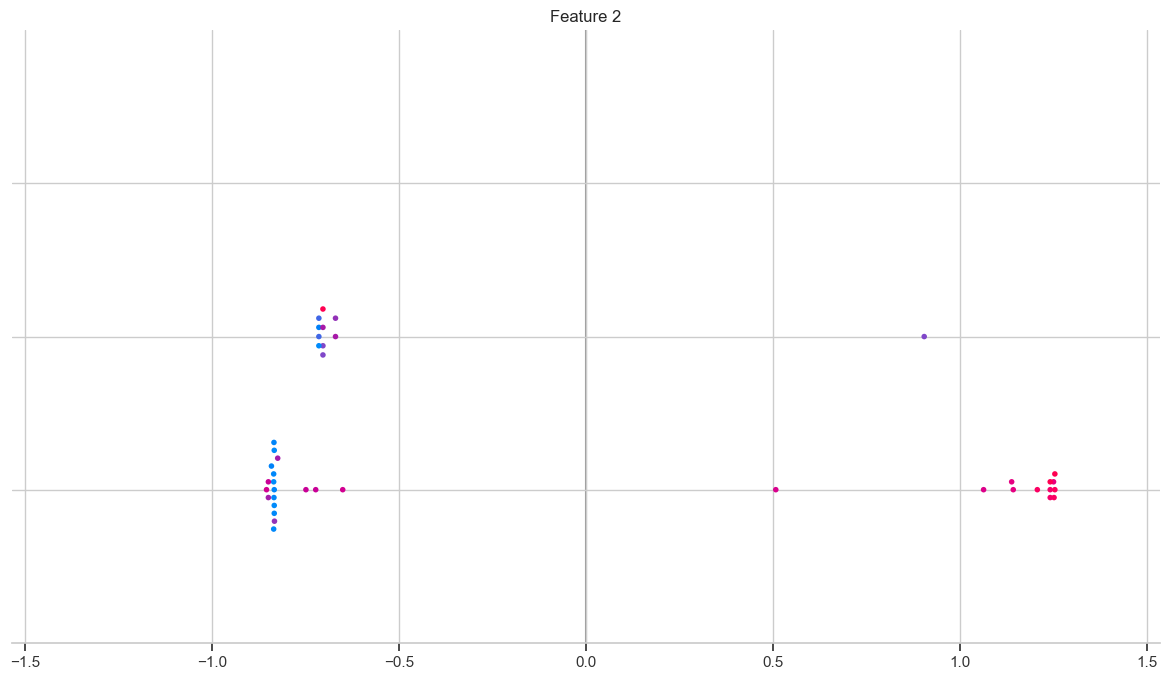

In [45]:
# Summary plot (bar plot of mean absolute SHAP values)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Summary plot (dot plot: feature effect across all samples)
shap.summary_plot(shap_values, X_test)


error analysis

1. Make Predictions

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)


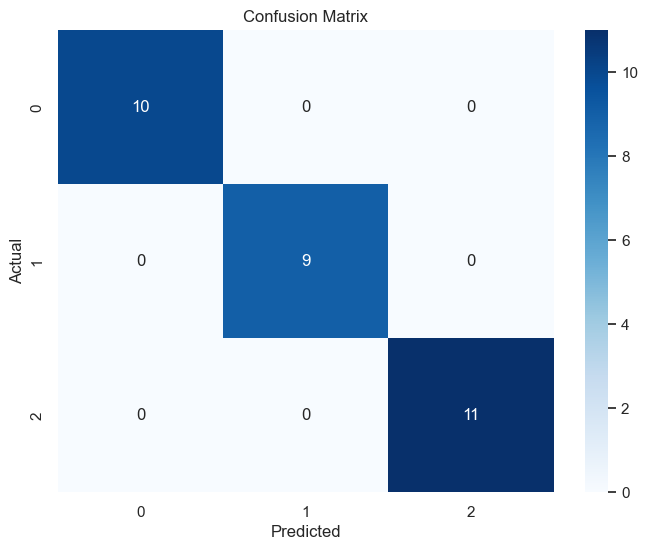

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# — ensure you have predictions —
# y_pred = best_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


3. Classification Report

In [50]:
# Detailed classification performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



 4. Examine Misclassifications

In [51]:
# Identify misclassified instances
misclassified_indices = (y_pred != y_test)
misclassified_samples = X_test[misclassified_indices]
actual_labels = y_test[misclassified_indices]
predicted_labels = y_pred[misclassified_indices]

# View sample of misclassifications
misclassified_df = pd.DataFrame(misclassified_samples)
misclassified_df['Actual'] = actual_labels
misclassified_df['Predicted'] = predicted_labels

print(misclassified_df.head(10))


Empty DataFrame
Columns: [0, 1, 2, 3, Actual, Predicted]
Index: []


Final Evaluation on Test Set:
Testing:

In [52]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Predict on test set
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate performance
f1 = f1_score(y_test, y_test_pred, average='macro')
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')

# Report results
print("Final Evaluation on Test Set:")
print(f"Macro F1 Score   : {f1:.4f}")
print(f"Macro Precision  : {precision:.4f}")
print(f"Macro Recall     : {recall:.4f}")


Final Evaluation on Test Set:
Macro F1 Score   : 1.0000
Macro Precision  : 1.0000
Macro Recall     : 1.0000


Comparison to Baseline:
Define a Baseline Model

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, precision_score, recall_score

# Create baseline model (most frequent strategy)
baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train, y_train)

# Predict on test set
y_baseline_pred = baseline.predict(X_test)

# Evaluate baseline
f1_baseline = f1_score(y_test, y_baseline_pred, average='macro')
precision_baseline = precision_score(y_test, y_baseline_pred, average='macro')
recall_baseline = recall_score(y_test, y_baseline_pred, average='macro')


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluate Final Model (already trained with XGBoost)

In [54]:
# Final model predictions
y_final_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate final model
f1_final = f1_score(y_test, y_final_pred, average='macro')
precision_final = precision_score(y_test, y_final_pred, average='macro')
recall_final = recall_score(y_test, y_final_pred, average='macro')


Step 3: Compare Results

In [55]:
print("Baseline Model:")
print(f"Macro F1 Score   : {f1_baseline:.4f}")
print(f"Macro Precision  : {precision_baseline:.4f}")
print(f"Macro Recall     : {recall_baseline:.4f}\n")

print("XGBoost Final Model:")
print(f"Macro F1 Score   : {f1_final:.4f}")
print(f"Macro Precision  : {precision_final:.4f}")
print(f"Macro Recall     : {recall_final:.4f}")


Baseline Model:
Macro F1 Score   : 0.1538
Macro Precision  : 0.1000
Macro Recall     : 0.3333

XGBoost Final Model:
Macro F1 Score   : 1.0000
Macro Precision  : 1.0000
Macro Recall     : 1.0000
